In [1]:
import numpy as np
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import time


# 1D GD

In [53]:
def grad(x):
    return -np.exp(-(x - 5)**2) * (-2*x +10)


In [11]:
step_size = 0.5
Nmax = 500
tol = 0.01

x = 6.5

for i in range(Nmax):

    x = x - step_size * grad(x)
    
    print(i, ': x = ', x, '; grad = ', grad(x))
    
    eps = np.abs(grad(x))
    if eps <= tol:
        print('Reach termination criteria.')
        break


0 : x =  6.34190116316 ; grad =  0.443319671001
1 : x =  6.12024132766 ; grad =  0.638745413186
2 : x =  5.80086862106 ; grad =  0.843410294613
3 : x =  5.37916347376 ; grad =  0.656780377638
4 : x =  5.05077328494 ; grad =  0.10128512742
5 : x =  5.00013072123 ; grad =  0.000261442450777
Reach termination criteria.


Remove redundant computation

In [12]:
step_size = 0.5
Nmax = 500
tol = 0.01

x = 6.5
gradx = grad(x)

for i in range(Nmax):
    

    x = x - step_size * gradx
    gradx = grad(x)
    
    print(i, ': x = ', x, '; grad = ', gradx)
    
    eps = np.abs(gradx)
    if eps <= tol:
        print('Reach termination criteria.')
        break


0 : x =  6.34190116316 ; grad =  0.443319671001
1 : x =  6.12024132766 ; grad =  0.638745413186
2 : x =  5.80086862106 ; grad =  0.843410294613
3 : x =  5.37916347376 ; grad =  0.656780377638
4 : x =  5.05077328494 ; grad =  0.10128512742
5 : x =  5.00013072123 ; grad =  0.000261442450777
Reach termination criteria.


# 2D GD

In [2]:
def g(u):
    assert type(u) == type(np.array([]))
    assert u.shape == (2, 1)

    loss = -np.exp(-53 - u[0,0] ** 2 - 2 * u[1,0] ** 2 - u[0,0] * u[1,0] + 10 * u[0,0] + 19 * u[1,0])

    return loss


In [3]:
def mkvec(a,b):
    return np.array([[a],[b]])


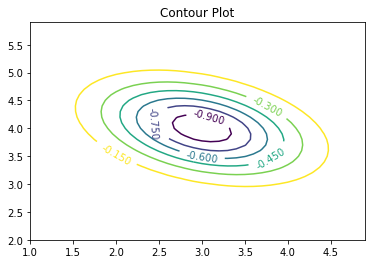

In [4]:
X = np.arange(1, 5, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot')
plt.show()


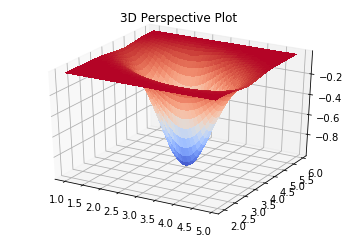

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.title('3D Perspective Plot')

plt.show()


In [6]:
def grad(u):
    assert type(u) == type(np.array([]))
    assert u.shape == (2,1)

    gu = g(u)
    # print('debug gu = ', gu)

    gradu = gu * np.array([[-2*u[0,0] - u[1,0] + 10],
                           [-4*u[1,0] - u[0,0] + 19]])

    # print('debug gradu = ', gradu)
    return gradu


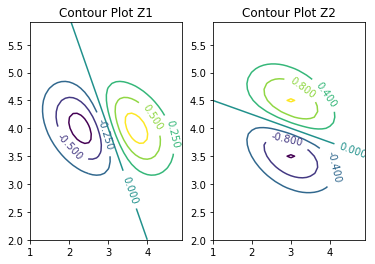

In [7]:
    # Plot contour of gradient
    
    Z1 = [[grad(mkvec(X[r,c], Y[r,c]))[0,0] for c in range(nC)] for r in range(nR)]
    Z2 = [[grad(mkvec(X[r,c], Y[r,c]))[1,0] for c in range(nC)] for r in range(nR)]

    plt.figure()
    plt.subplot(1,2,1)
    CS = plt.contour(X, Y, Z1)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contour Plot Z1')

    plt.subplot(1,2,2)
    CS = plt.contour(X, Y, Z2)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.title('Contour Plot Z2')
    plt.show()


Pilot run of GD on 2D space

In [8]:
v1 = np.array([[3], [4]])
v2 = np.array([[5], [6]])

vs = np.hstack((np.array([[],[]]), v1))
vs.shape
vs

array([[ 3.],
       [ 4.]])

In [9]:
c1 = time.time()

step_size = 0.01
Nmax = 1000
tol = 0

v0 = np.array([[2.5], [3.5]]) # v* = 3, 4

losses = []
vs = np.array([[],[]]) # empty array of shape (2,1)
norms = []

v = v0
gradv = grad(v)
for i in range(Nmax):
    v = v - step_size * gradv
    gradv = grad(v)
    loss = g(v)
    eps = np.linalg.norm(gradv)

    #print(i, 'v =', v, ': loss =', loss, 'eps =', eps)
    losses.append(loss)
    vs = np.hstack((vs, v))
    norms.append(eps) 

    if  eps <= tol:
        print('Reach termination criteria')
        break

c2 = time.time()
print('time spent: ', c2 - c1) # 0.46866393089294434 (for 1000)

print('v = ', v)


time spent:  0.23431992530822754
v =  [[ 2.99999996]
 [ 4.00000002]]


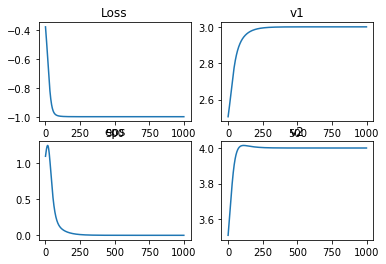

In [10]:
plt.subplot(2,2,1)
plt.plot(range(Nmax), losses)
plt.title('Loss')
plt.subplot(2,2,3)
plt.plot(range(Nmax), norms)
plt.title('eps')

plt.subplot(2,2,2)
plt.plot(range(Nmax), vs[0,:])
plt.title('v1')
plt.subplot(2,2,4)
plt.plot(range(Nmax), vs[1,:])
plt.title('v2')

plt.show()


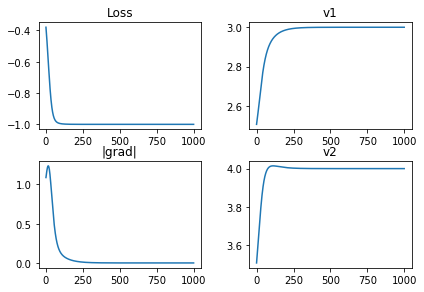

In [11]:
# Nicer plot

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()

plt.subplot(2,2,1)
plt.plot(range(Nmax), losses)
plt.title('Loss')
plt.subplot(2,2,3)
plt.plot(range(Nmax), norms)
plt.title('|grad|')

plt.subplot(2,2,2)
plt.plot(range(Nmax), vs[0,:])
plt.title('v1')
plt.subplot(2,2,4)
plt.plot(range(Nmax), vs[1,:])
plt.title('v2')

plt.show()


# Refine to show

In [12]:
c1 = time.time()

step_size = 0.4
Nmax = 1000
tol = 1e-6

v0 = np.array([[2.5], [3.5]]) # v* = 3, 4

losses = []
vs = np.array([[],[]]) # empty array of shape (2,1)
norms = []

v = v0
gradv = grad(v)
for i in range(Nmax):
    v = v - step_size * gradv
    gradv = grad(v)
    loss = g(v)
    eps = np.linalg.norm(gradv)

    #print(i, 'v =', v, ': loss =', loss, 'eps =', eps)
    if i < 5 or i%100 == 99:
        print('{}: v = [{:.3f} {:.3f}]; loss = {:.4f}; grad = [{:.4f} {:.4f}]; |grad| = {:.7f}'.format(i,
                     v[0,0],v[1,0],loss, gradv[0,0], gradv[1,0], eps))
    
    
    losses.append(loss)
    vs = np.hstack((vs, v))
    norms.append(eps) 

    if  eps <= tol:
        print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
        break

c2 = time.time()
print('Finished.\nTime spent: ', c2 - c1) # 0.46866393089294434 (for 1000)
print('{}: v = [{:.3f} {:.3f}]; grad = [{:.3f} {:.3f}]'.format(i,v[0,0],v[1,0], gradv[0,0], gradv[1,0]))


0: v = [2.721 3.868]; loss = -0.8609; grad = [-0.5946 -0.6954]; |grad| = 0.9149178
1: v = [2.959 4.146]; loss = -0.9624; grad = [0.0608 0.5223]; |grad| = 0.5258063
2: v = [2.934 3.937]; loss = -0.9838; grad = [-0.1912 -0.3121]; |grad| = 0.3660504
3: v = [3.011 4.062]; loss = -0.9916; grad = [0.0827 0.2564]; |grad| = 0.2694593
4: v = [2.978 3.959]; loss = -0.9953; grad = [-0.0849 -0.1839]; |grad| = 0.2025759
Reach termination criteria at i=50 with 0.0000009
Finished.
Time spent:  0.0
50: v = [3.000 4.000]; grad = [-0.000 -0.000]


In [13]:
c1 = time.time()

step_size = 0.01
Nmax = 1000
tol = 1e-6

v0 = np.array([[2.5], [3.5]]) # v* = 3, 4

losses = []
vs = np.array([[],[]]) # empty array of shape (2,1)
norms = []

v = v0
gradv = grad(v)
for i in range(Nmax):
    v = v - step_size * gradv
    gradv = grad(v)
    loss = g(v)
    eps = np.linalg.norm(gradv)

    #print(i, 'v =', v, ': loss =', loss, 'eps =', eps)
    if i < 5 or i%100 == 99:
        print('{}: v = [{:.3f} {:.3f}]; loss = {:.4f}; grad = [{:.4f} {:.4f}]; |grad| = {:.7f}'.format(i,
                     v[0,0],v[1,0],loss, gradv[0,0], gradv[1,0], eps))
    
    
    losses.append(loss)
    vs = np.hstack((vs, v))
    norms.append(eps) 

    if  eps <= tol:
        print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
        break

c2 = time.time()
print('Finished.\nTime spent: ', c2 - c1) # 0.46866393089294434 (for 1000)
print('{}: v = [{:.3f} {:.3f}]; grad = [{:.3f} {:.3f}]'.format(i,v[0,0],v[1,0], gradv[0,0], gradv[1,0]))

    


0: v = [2.506 3.509]; loss = -0.3795; grad = [-0.5615 -0.9326]; |grad| = 1.0886196
1: v = [2.511 3.519]; loss = -0.3914; grad = [-0.5711 -0.9452]; |grad| = 1.1043236
2: v = [2.517 3.528]; loss = -0.4037; grad = [-0.5806 -0.9572]; |grad| = 1.1195790
3: v = [2.523 3.538]; loss = -0.4163; grad = [-0.5900 -0.9688]; |grad| = 1.1343048
4: v = [2.529 3.547]; loss = -0.4293; grad = [-0.5991 -0.9798]; |grad| = 1.1484165
99: v = [2.928 4.013]; loss = -0.9955; grad = [-0.1295 -0.0186]; |grad| = 0.1308550
199: v = [2.987 4.005]; loss = -0.9998; grad = [-0.0214 0.0081]; |grad| = 0.0229128
299: v = [2.997 4.001]; loss = -1.0000; grad = [-0.0043 0.0018]; |grad| = 0.0046317
399: v = [2.999 4.000]; loss = -1.0000; grad = [-0.0009 0.0004]; |grad| = 0.0009365
499: v = [3.000 4.000]; loss = -1.0000; grad = [-0.0002 0.0001]; |grad| = 0.0001894
599: v = [3.000 4.000]; loss = -1.0000; grad = [-0.0000 0.0000]; |grad| = 0.0000383
699: v = [3.000 4.000]; loss = -1.0000; grad = [-0.0000 0.0000]; |grad| = 0.00000

In [14]:
2.5 -0.01*-0.5518

2.505518

Trajectory Plot

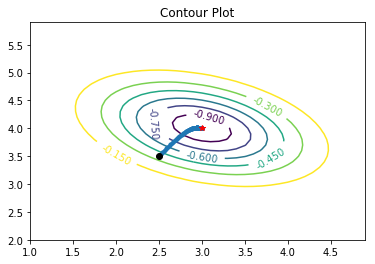

In [15]:
X = np.arange(1, 5, 0.1)
Y = np.arange(2, 6, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot')

# Add trajectory

plt.plot(vs[0,:], vs[1,:], '.')
plt.plot(v0[0,0], v0[1,0], 'ko')
plt.plot(vs[0,-1], vs[1,-1], 'r*')

plt.show()

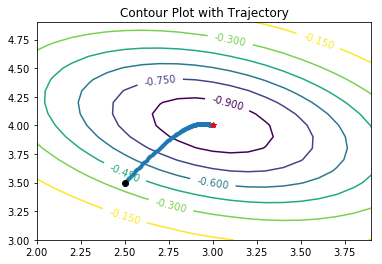

In [16]:
X = np.arange(2, 4, 0.1)
Y = np.arange(3, 5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot with Trajectory')

# Add trajectory

plt.plot(vs[0,:], vs[1,:], '.')
plt.plot(v0[0,0], v0[1,0], 'ko')
plt.plot(vs[0,-1], vs[1,-1], 'r*')

plt.show()

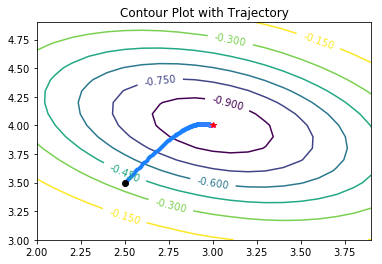

In [17]:
X = np.arange(2, 4, 0.1)
Y = np.arange(3, 5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot with Trajectory')

# Add trajectory

_, n = vs.shape

c = 0
for i in range(n):
    plt.plot(vs[0,i], vs[1,i], marker='.', color=(c, 0.5, 1))
    
    if i % 100 == 0:
        c += 1/10


plt.plot(v0[0,0], v0[1,0], 'ko')
plt.plot(vs[0,-1], vs[1,-1], 'r*')

plt.show()

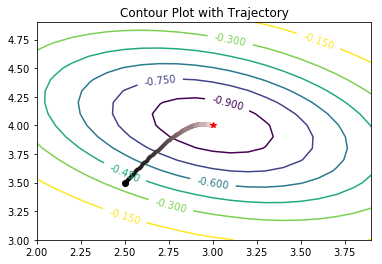

In [18]:
X = np.arange(2, 4, 0.1)
Y = np.arange(3, 5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot with Trajectory')

# Add trajectory

_, n = vs.shape

cr,cg,cb = 0,0,0

for i in range(60):
    plt.plot(vs[0,i], vs[1,i], marker='.', color=(cr, cg, cb))
    
    cr += 0.6/60
    cg += 0.5/60
    cb += 0.5/60
    
plt.plot(vs[0,60:80], vs[1,60:80], marker='.', color=(0.6, 0.5, 0.5))
plt.plot(vs[0,80:100], vs[1,80:100], marker='.', color=(0.7, 0.6, 0.6))
plt.plot(vs[0,100:150], vs[1,100:150], marker='.', color=(0.8, 0.7, 0.7))
plt.plot(vs[0,150:], vs[1,150:], marker='.', color=(0.9, 0.8, 0.8))


plt.plot(v0[0,0], v0[1,0], 'ko')
plt.plot(vs[0,-1], vs[1,-1], 'r*')

plt.show()

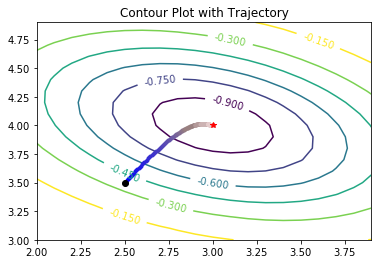

In [19]:
X = np.arange(2, 4, 0.1)
Y = np.arange(3, 5, 0.1)
X, Y = np.meshgrid(X, Y)
nR, nC = X.shape
Z = [[g(mkvec(X[r,c], Y[r,c])) for c in range(nC)] for r in range(nR)]

plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour Plot with Trajectory')

# Add trajectory

_, n = vs.shape

cr,cg,cb = 0,0,1

for i in range(60):
    plt.plot(vs[0,i], vs[1,i], marker='.', color=(cr, cg, cb))
    
    cr += 0.6/60
    cg += 0.5/60
    cb -= 0.5/60
    
plt.plot(vs[0,60:80], vs[1,60:80], marker='.', color=(0.6, 0.5, 0.5))
plt.plot(vs[0,80:100], vs[1,80:100], marker='.', color=(0.7, 0.6, 0.6))
plt.plot(vs[0,100:150], vs[1,100:150], marker='.', color=(0.8, 0.7, 0.7))
plt.plot(vs[0,150:], vs[1,150:], marker='.', color=(0.9, 0.8, 0.8))


plt.plot(v0[0,0], v0[1,0], 'ko')
plt.plot(vs[0,-1], vs[1,-1], 'r*')

plt.show()

# Effect of step sizes

In [27]:
def experimenter(step_size, Nmax, v0=np.array([[2.5], [3.5]]), tol=1e-6, mute=False):
    c1 = time.time()

    # step_size = 0.4
    # Nmax = 1000
    # tol = 1e-6

    # v0 = np.array([[2.5], [3.5]]) # v* = 3, 4

    losses = []
    vs = np.array([[],[]]) # empty array of shape (2,1)
    norms = []

    v = v0
    gradv = grad(v)
    for i in range(Nmax):
        v = v - step_size * gradv
        gradv = grad(v)
        loss = g(v)
        eps = np.linalg.norm(gradv)

        #print(i, 'v =', v, ': loss =', loss, 'eps =', eps)
        if not mute:
            if i < 5 or i%100 == 99:
                print('{}: v = [{:.3f} {:.3f}]; loss = {:.4f}; grad = [{:.4f} {:.4f}]; |grad| = {:.7f}'.format(i,
                             v[0,0],v[1,0],loss, gradv[0,0], gradv[1,0], eps))


        losses.append(loss)
        vs = np.hstack((vs, v))
        norms.append(eps) 

        if  eps <= tol:
            print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
            break

    c2 = time.time()
    if not mute:
        print('Finished.\nTime spent: ', c2 - c1) # 0.46866393089294434 (for 1000)
        print('{}: v = [{:.3f} {:.3f}]; grad = [{:.3f} {:.3f}]'.format(i,v[0,0],v[1,0], gradv[0,0], gradv[1,0]))
    
    return losses, vs, c2-c1

Reach termination criteria at i=50 with 0.0000009


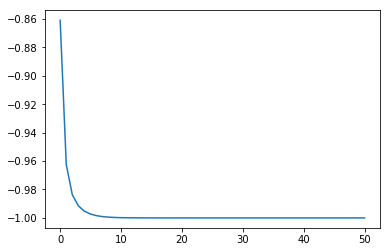

In [30]:
loss1, vans1, time1 = experimenter(0.4, 1000, np.array([[2.5], [3.5]]), 1e-6, mute=True)

plt.plot(loss1)

In [38]:
ssize = [0.1, 0.2, 0.4, 0.8]
ex_losses = []
ex_v = []
ex_time = []
for ss in ssize:
    l, v, t = experimenter(ss, 1000, np.array([[2.5], [3.5]]), 1e-6, mute=True)
    ex_losses.append(l)
    ex_v.append(v)
    ex_time.append(t)


Reach termination criteria at i=77 with 0.0000009
Reach termination criteria at i=35 with 0.0000008
Reach termination criteria at i=50 with 0.0000009


In [61]:
import matplotlib

font = {'family' : 'consolas',
#         'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)

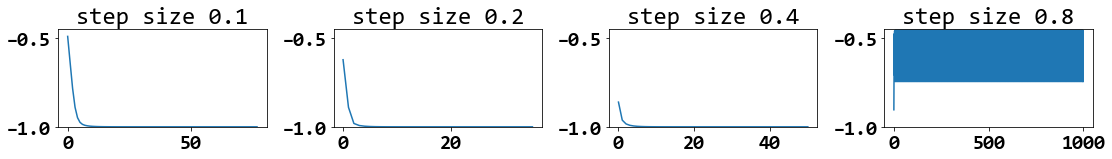

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.tight_layout(rect=[0.4, 0.4, 3, 1], h_pad=2)

ymin, ymax = -1, -0.45

for i in range(4):
    plt.subplot(1,4,1+i)
    plt.plot(ex_losses[i])
    plt.title('step size %.1f'%ssize[i])
    plt.ylim((ymin, ymax))

plt.show()


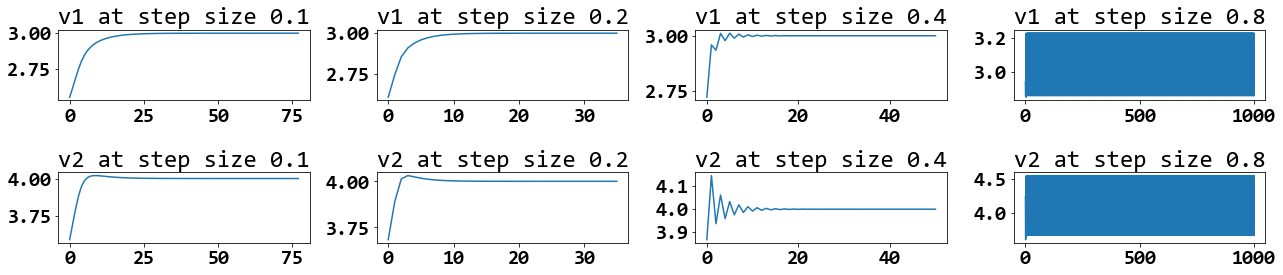

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.tight_layout(rect=[0., 0., 3, 1], h_pad=2)

ymin, ymax = -1, -0.45

for i in range(4):
    plt.subplot(2,4,1+i)
    plt.plot(ex_v[i][0])
    plt.title('v1 at step size %.1f'%ssize[i])
#     plt.ylim((ymin, ymax))

    plt.subplot(2,4,5+i)
    plt.plot(ex_v[i][1])
    plt.title('v2 at step size %.1f'%ssize[i])


plt.show()

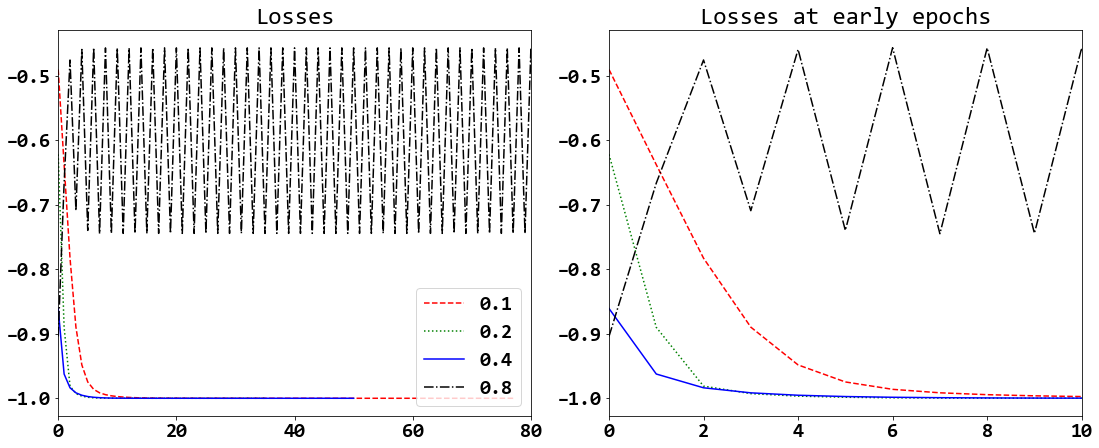

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(rect=[0.4, 0.4, 3, 2], h_pad=2)

xmin, xmax = 0, 80
plt.subplot(1,2,1)
plt.plot(ex_losses[0], 'r--')
plt.plot(ex_losses[1], 'g:')
plt.plot(ex_losses[2], 'b-')
plt.plot(ex_losses[3], 'k-.')
plt.legend(('0.1', '0.2', '0.4', '0.8'), loc='lower right')
plt.xlim((xmin, xmax))


plt.title('Losses')

xmin, xmax = 0, 10
plt.subplot(1,2,2)
plt.plot(ex_losses[0], 'r--')
plt.plot(ex_losses[1], 'g:')
plt.plot(ex_losses[2], 'b-')
plt.plot(ex_losses[3], 'k-.')
plt.title('Losses at early epochs')
plt.xlim((xmin, xmax))



plt.show()

# Effect of initialization

In [2]:
def g(u):
    return np.cos(2*np.pi * u - np.pi/4) * np.exp( - u**2 /(np.pi))

In [3]:
g(0)

0.70710678118654757

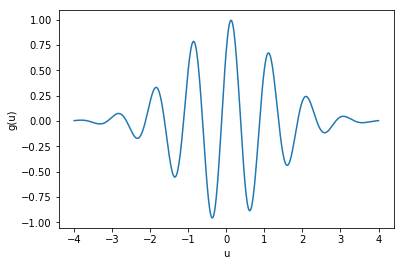

In [4]:
xs = np.linspace(-4, 4, 500)
plt.plot(xs, g(xs))
plt.xlabel('u')
plt.ylabel('g(u)')

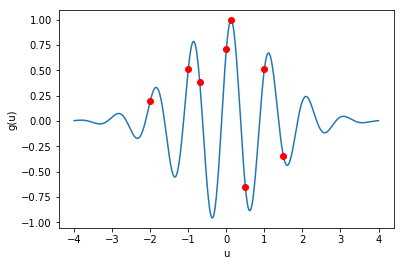

In [43]:
plt.plot(xs, g(xs))
plt.xlabel('u')
plt.ylabel('g(u)')

us = np.array([-2, -1, -0.7, 0, 0.12301636938191951, 0.5, 1, 1.5])

plt.plot(us, g(us), 'ro')

In [6]:
def grad(u):
    return -2 * np.pi * np.sin(2*np.pi * u - np.pi/4) * np.exp( - u**2 /(np.pi)) - 2 * u /np.pi * np.cos(2*np.pi * u - np.pi/4) * np.exp( - u**2 /(np.pi))

In [33]:
from scipy import optimize

root = optimize.bisect(grad, 0.122, 0.124)
root

0.12301636938191951

In [34]:
grad(0.12301636938191951)

-3.5642599982566026e-12

In [44]:
g(0.12301636938191951)

0.99511729554054451

In [45]:
g(0.12301636938191951 + 0.000001)

0.99511729552058181

In [46]:
g(0.12301636938191951 - 0.000001)

0.99511729552058192

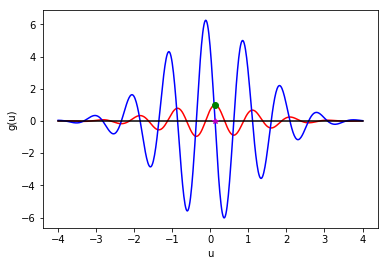

In [47]:
plt.plot(xs, g(xs), 'r')
plt.plot(xs, grad(xs), 'b')

plt.plot([-4, 4], [0, 0], 'k')
plt.plot(0.12301636938191951, g(0.12301636938191951), 'go')
plt.plot(0.12301636938191951, grad(0.12301636938191951), 'm*')


plt.xlabel('u')
plt.ylabel('g(u)')

# Example of random initialization

In [163]:
np.random.normal(2, 5, 10)

array([ 6.63576283,  1.73970926,  2.32237256,  3.12629942,  8.59330989,
        1.23390496, -7.62991015,  6.72912201,  2.93859311,  1.65361715])

In [181]:
np.random.uniform(-4, 4, 1)[0]

3.6076435481896301

In [165]:
v = np.random.uniform(-4, 4, 2)
v

array([ 3.32494996, -3.98672873])

In [179]:
v.reshape(2,1)
v.shape

(2,)

In [178]:
np.reshape(v, (2, 1, 1))
v

array([ 3.32494996, -3.98672873])

# Case of multimodal problem

# Constrained Optimization

In [2]:
def f(x):
    return np.sin(x)/(1 + x**2)

In [3]:
# in-feasible region

xregion = [-20, 0, 0, -20]
yregion = [-1, -1, 1, 1]


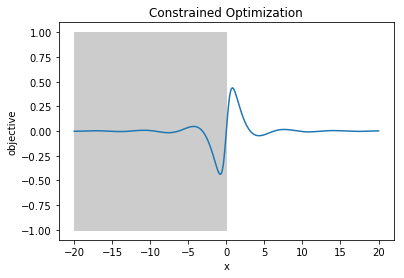

In [4]:
xs = np.linspace(-20,20,500)
plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs))
plt.xlabel('x')
plt.ylabel('objective')
plt.title('Constrained Optimization')

In [5]:
def P(x):
    return -x * (x < 0)

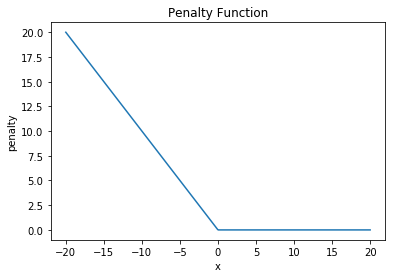

In [6]:
plt.plot(xs, P(xs))
plt.xlabel('x')
plt.ylabel('penalty')
plt.title('Penalty Function')

Define gd function

In [7]:
def gd(grad, v0, g=None, step_size = 0.01, Nmax = 1000, tol = 1e-6):
    '''
    grad: gradient function
    v0: initial value
    g: objective function
    '''

    if g is None:
        g = lambda v: 0
    
    losses = []
    v = v0
    gradv = grad(v)
    
    for i in range(Nmax):
        v = v - step_size * gradv
        gradv = grad(v)
        
        loss = g(v)
        losses.append(loss)

        eps = np.linalg.norm(gradv)
        if  eps <= tol:
            print('Reach termination criteria at i={} with {:.7f}'.format(i, eps))
            break

    return v, losses

In [8]:
# from sympy import symbols, sin, exp, diff

In [9]:
# x = symbols('x')

In [10]:
# diff(sin(x),x)

In [11]:
# diff(sin(x)/(1 + x**2),x)

In [12]:
# hand derivative: d(a/b)/x = 1/b * da/dx - a * db/dx * 1/b^2

def gradf(x):
    return -2*x*np.sin(x)/(x**2 + 1)**2 + np.cos(x)/(x**2 + 1)

In [13]:
x, fs = gd(gradf, 0, f)

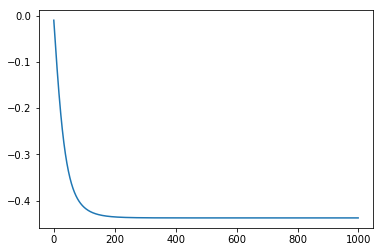

In [14]:
plt.plot(fs)

In [15]:
x

-0.79799249830971652

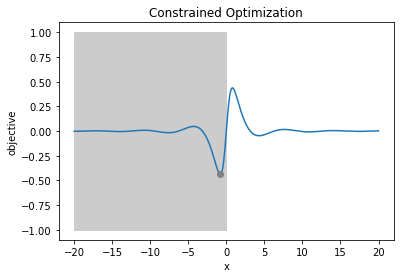

In [16]:
xs = np.linspace(-20,20,500)
plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs))
plt.plot(x, f(x), marker='o', color=(0.5, 0.5, 0.5))
plt.xlabel('x')
plt.ylabel('objective')
plt.title('Constrained Optimization')

In [17]:
def loss(x, la):
    return f(x) + la * P(x)

(-0.5, 1.5)

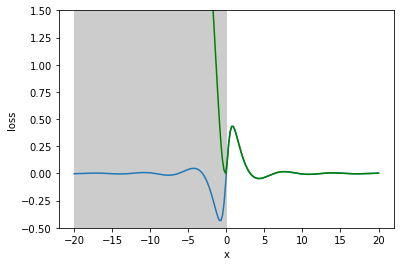

In [18]:
xmin, xmax = -20, 20
ymin, ymax = -0.5, 1.5

xs = np.linspace(xmin,xmax,200)

xregion = [xmin, 0, 0, xmin]
yregion = [ymin, ymin, ymax, ymax]

plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs))
#plt.plot(x, f(x), marker='o', color=(0.5, 0.5, 0.5))
plt.plot(xs, loss(xs, 1), color='green')
plt.xlabel('x')
plt.ylabel('loss')
#plt.title('Constrained Optimization')
plt.ylim((ymin, ymax))

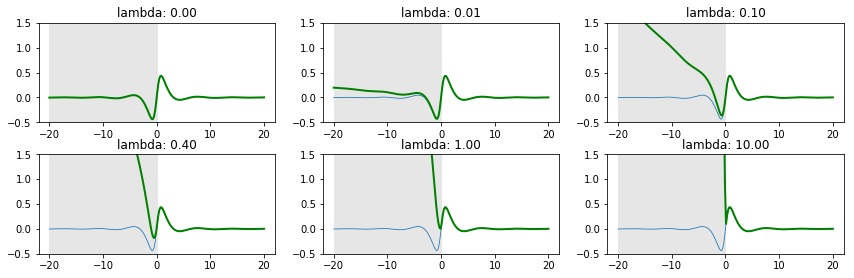

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3)
# fig.tight_layout()
fig.tight_layout(rect=[0.0, 0.0, 2, 0.95])

lambs = [0, 0.01, 0.1, 0.4, 1, 10]

for i in range(6):
    plt.subplot(2, 3, 1 + i)
    plt.fill(xregion, yregion, color=(0.9, 0.9, 0.9)) 
    plt.plot(xs, f(xs), linewidth=0.8)
    #plt.plot(x, f(x), marker='o', color=(0.5, 0.5, 0.5))

    lamb = lambs[i]
    plt.plot(xs, loss(xs, lamb), 'g', linewidth=2)
#     plt.xlabel('x')
#     plt.ylabel('loss')
    plt.title('lambda: %.2f'%lamb)
    plt.ylim((ymin, ymax))

plt.show()

In [28]:
def gradloss(x, la):
    return gradf(x) + la*(-1 * (x < 0))

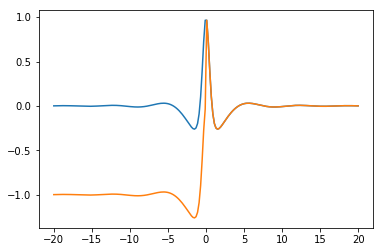

In [32]:
plt.plot(xs, gradf(xs))
plt.plot(xs, gradloss(xs, 1))

In [35]:
lamb = 0.4
loss_la = lambda x: loss(x, lamb)
grad_la = lambda x: gradloss(x, lamb)

x, fs = gd(grad_la, 0, loss_la)

print('x*=', x)

Reach termination criteria at i=827 with 0.0000010
x*= -0.497077934025


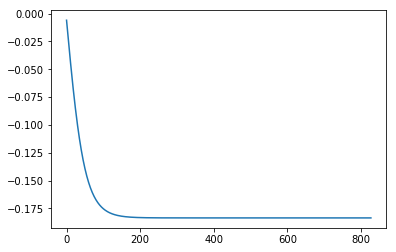

In [36]:
plt.plot(fs)

(-10, 10)

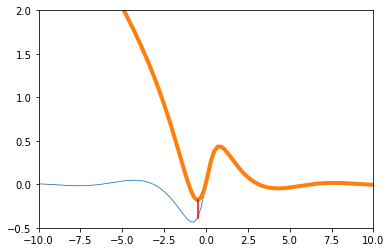

In [48]:
plt.plot(xs, f(xs), linewidth=0.8)
plt.plot(xs, loss_la(xs), linewidth=4)
plt.plot([x, x], [f(x), loss_la(x)], 'r')
plt.ylim([-0.5,2])
plt.xlim((-10, 10))

# Plot of Constrained Program with GD

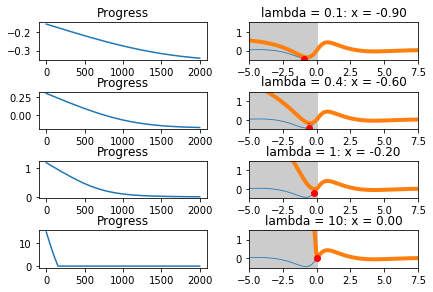

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.tight_layout(rect=[0.0, 0.0, 1, 1])
xmin, xmax = -5, 7.5
ymin, ymax = -0.5, 1.5

xs = np.linspace(xmin,xmax,200)

xregion = [xmin, 0, 0, xmin]
yregion = [ymin, ymin, ymax, ymax]

lambs = [0.1, 0.4, 1, 10]

x0 = np.random.normal()

for i in range(4):
    lamb = lambs[i]
    loss_la = lambda x: loss(x, lamb)
    grad_la = lambda x: gradloss(x, lamb)

    x, fs = gd(grad_la, x0, loss_la, step_size=0.001, Nmax=2000, tol=1e-6)

    plt.subplot(4,2,1 + 2*i)
    plt.plot(fs)
    plt.title('Progress')

    plt.subplot(4,2,2 + 2*i)
    plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
    plt.plot(xs, f(xs), linewidth=0.8)
    plt.plot(xs, loss_la(xs), linewidth=4)
    plt.plot([x, x], [f(x), loss_la(x)], 'r:')
    plt.plot(x, f(x), 'ro')
    plt.title('lambda = {}: x = {:.2f}'.format(lamb, x))
    plt.ylim([ymin,ymax])
    plt.xlim((xmin,xmax))


# Constrained Problem 2

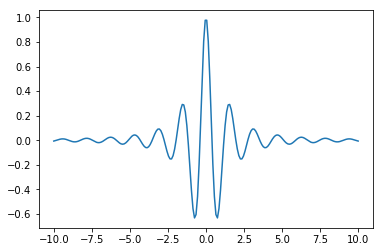

In [84]:
def f(x):
    return np.cos(4*x)/(1 + x**2)


xs = np.linspace(-10,10, 200)
plt.plot(xs, f(xs))

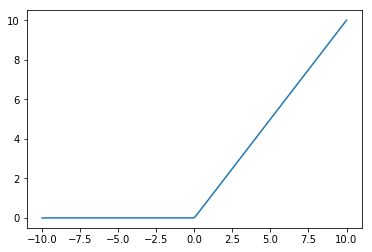

In [85]:
def P(x):
    return x * (x > 0)

plt.plot(xs, P(xs))

In [86]:
def gradf(x):
    return -2*x*np.cos(4*x)/(x**2 + 1)**2 - 4* np.sin(4*x)/(x**2 + 1)

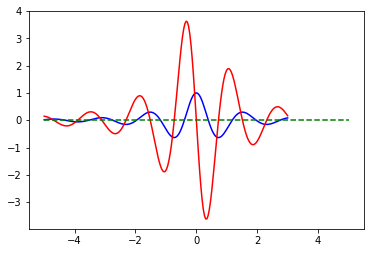

In [146]:
plt.plot(xs, f(xs), 'b-')
plt.plot(xs, gradf(xs), 'r-')
plt.plot([-5, 5], [0, 0], 'g--')


Reach termination criteria at i=139 with 0.0000009


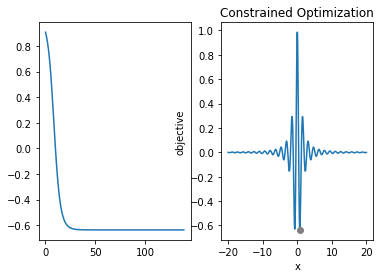

In [89]:
x0 = np.random.normal()
x, fs = gd(gradf, x0, f)

plt.subplot(1,2,1)
plt.plot(fs)

plt.subplot(1,2,2)
xs = np.linspace(-20,20,500)
plt.plot(xs, f(xs))
plt.plot(x, f(x), marker='o', color=(0.5, 0.5, 0.5))
plt.xlabel('x')
plt.ylabel('objective')
plt.title('Constrained Optimization')

In [156]:
def loss(x, la):
    return f(x) + la * P(x)

def gradloss(x, la):
    return gradf(x) + la * (x > 0)

(-4, 4)

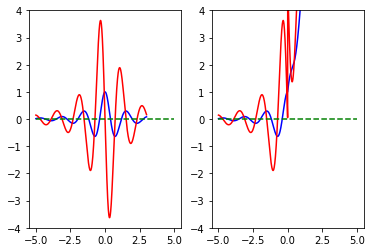

In [174]:
# Check gradient
xs = np.linspace(xmin,xmax,1000)

plt.subplot(1,2,1)
plt.plot(xs, f(xs), 'b-')
plt.plot(xs, gradf(xs), 'r-')
plt.plot([-5, 5], [0, 0], 'g--')
plt.ylim((-4,4))

plt.subplot(1,2,2)
lamb = 5
plt.plot(xs, loss(xs, lamb), 'b-')
plt.plot(xs, gradloss(xs, lamb), 'r-')
plt.plot([-5, 5], [0, 0], 'g--')
#plt.plot([0.3], gradloss(0.3, lamb), 'ko')
plt.ylim((-4,4))

x0 =  -0.3
Reach termination criteria at i=130 with 0.0000010
Reach termination criteria at i=1377 with 0.0000010


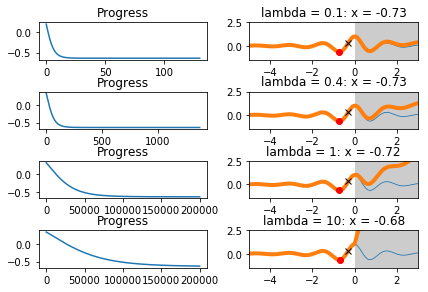

In [176]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.tight_layout(rect=[0.0, 0.0, 1, 1])
xmin, xmax = -5, 3
ymin, ymax = -1.5, 2.5

xs = np.linspace(xmin,xmax,200)

xregion = [xmax, 0, 0, xmax]
yregion = [ymin, ymin, ymax, ymax]

lambs = [0.1, 0.4, 1, 10]
ss = [0.01, 0.001, 2e-6, 1e-6] 

#x0 = np.random.normal()
x0 = -0.3
print('x0 = ', x0)

for i in range(4):
    lamb = lambs[i]
    loss_la = lambda x: loss(x, lamb)
    grad_la = lambda x: gradloss(x, lamb)

    x, fs = gd(grad_la, x0, loss_la, step_size=ss[i], Nmax=200000, tol=1e-6)

    plt.subplot(4,2,1 + 2*i)
    plt.plot(fs)
    plt.title('Progress')

    plt.subplot(4,2,2 + 2*i)
    plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
    plt.plot(xs, f(xs), linewidth=0.8)
    plt.plot(xs, loss_la(xs), linewidth=4)
    plt.plot([x, x], [f(x), loss_la(x)], 'r:')
    plt.plot(x0, loss_la(x0), 'kx')
    plt.plot(x, f(x), 'ro')
    plt.title('lambda = {}: x = {:.2f}'.format(lamb, x))
    plt.ylim([ymin,ymax])
    plt.xlim((xmin,xmax))


x0 =  0.3
Reach termination criteria at i=128 with 0.0000010
Reach termination criteria at i=1308 with 0.0000010


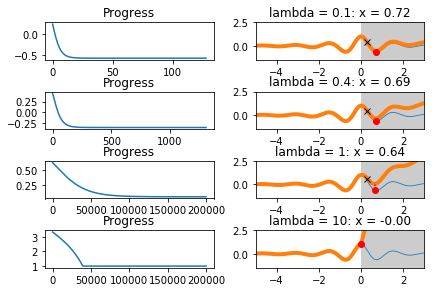

In [177]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.tight_layout(rect=[0.0, 0.0, 1, 1])
xmin, xmax = -5, 3
ymin, ymax = -1.5, 2.5

xs = np.linspace(xmin,xmax,200)

xregion = [xmax, 0, 0, xmax]
yregion = [ymin, ymin, ymax, ymax]

lambs = [0.1, 0.4, 1, 10]
ss = [0.01, 0.001, 2e-6, 1e-6] 

#x0 = np.random.normal()
x0 = 0.3
print('x0 = ', x0)

for i in range(4):
    lamb = lambs[i]
    loss_la = lambda x: loss(x, lamb)
    grad_la = lambda x: gradloss(x, lamb)

    x, fs = gd(grad_la, x0, loss_la, step_size=ss[i], Nmax=200000, tol=1e-6)

    plt.subplot(4,2,1 + 2*i)
    plt.plot(fs)
    plt.title('Progress')

    plt.subplot(4,2,2 + 2*i)
    plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
    plt.plot(xs, f(xs), linewidth=0.8)
    plt.plot(xs, loss_la(xs), linewidth=4)
    plt.plot([x, x], [f(x), loss_la(x)], 'r:')
    plt.plot(x0, loss_la(x0), 'kx')
    plt.plot(x, f(x), 'ro')
    plt.title('lambda = {}: x = {:.2f}'.format(lamb, x))
    plt.ylim([ymin,ymax])
    plt.xlim((xmin,xmax))


# Bimodal Constrained Problem 1

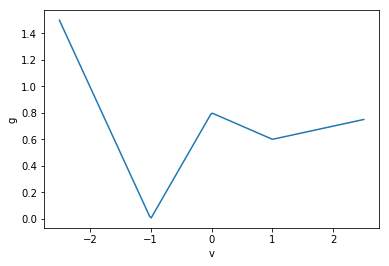

In [287]:
def relu(x, c, a):
    return a * (x+c) *( (x+c) > 0)

def f1(x):
    return  relu(-x, -1, 1) + relu(x, 1, 1) + relu(x, 0, -2) + relu(x, -1, 2)

def f(x, a):
    p1 =  (x < -1) * a[0] * -(x + 1)  
    p2 = (-1 <= x ) * (x < 0 ) * a[1] * (x + 1) 
    p3 = (0 <= x) * (x < 1) * (a[2]*-x + a[1])
    p4 = (x > 1) * (a[3]*(x-1) - a[2] + a[1])
    
    return   p1 + p2 + p3 + p4


xs = np.linspace(-2.5,2.5, 200)
plt.plot(xs, f(xs, [1, 0.8, 0.2, 0.1]))
plt.xlabel('v')
plt.ylabel('g')

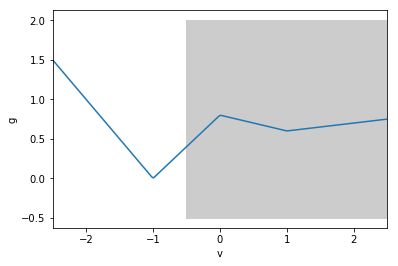

In [289]:
xmin, xmax = -2.5, 2.5
ymin, ymax = -0.5, 2

# Constraint
xregion = [xmax, -0.5, -0.5, xmax]
yregion = [ymin, ymin, ymax, ymax]

xs = np.linspace(-2.5,2.5, 200)
plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs, [1, 0.8, 0.2, 0.1]))
plt.xlim((xmin, xmax))
plt.xlabel('v')
plt.ylabel('g')

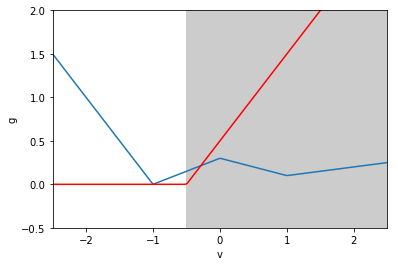

In [297]:
def P(x):
    return (x+0.5) * (x > -0.5)

plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs, [1, 0.3, 0.2, 0.1]))
plt.plot(xs, P(xs), 'r')    
plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))
plt.xlabel('v')
plt.ylabel('g')



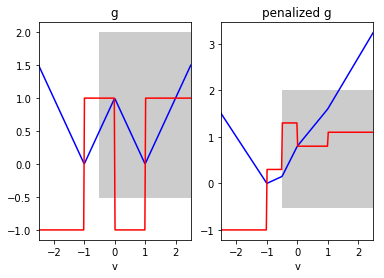

In [305]:
def loss(x, la, a=[1, 0.3, 0.2, 0.1]):
    return f(xs, a) + la * P(x)

def gradf(x, a):
    dp1 =  (x < -1) * -a[0]  
    dp2 = (-1 <= x ) * (x < 0 ) * a[1] 
    dp3 = (0 <= x) * (x < 1) * -a[2]
    dp4 = (x > 1) * a[3]

    return dp1 + dp2 + dp3 + dp4
    
def gradloss(x, la, a=[1, 0.3, 0.2, 0.1]):
    return gradf(x, a) + la * (x > -0.5)

plt.subplot(1,2,1)
plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, f(xs, [1, 1, 1, 1]), 'b')
plt.plot(xs, gradf(xs, [1, 1, 1, 1]), 'r')
plt.xlim((xmin, xmax))
#plt.ylim((ymin, ymax))
plt.xlabel('v')
plt.title('g')
#plt.ylabel('g')

plt.subplot(1,2,2)
plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
plt.plot(xs, loss(xs, 1), 'b')
plt.plot(xs, gradloss(xs, 1), 'r')
plt.xlim((xmin, xmax))
#plt.ylim((ymin, ymax))
plt.xlabel('v')
plt.title('penalized g')
#plt.ylabel('g')


This is not good.
It raises a case against optimal point grad = 0.

# Bi-modal Constrained Problem 2

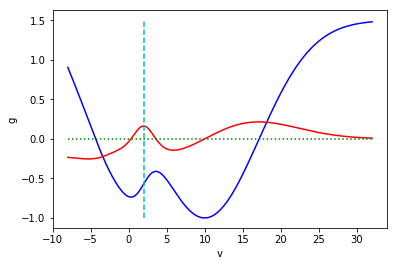

In [377]:
def f(x):
    p1 = 0.2 * np.log(1 + np.exp(-x-3))  
    p2 = 1.5/(1 + np.exp(-x +2))
    p3 = -2.5*np.exp(-0.01*(x - 10)**2)
    
    return p1 + p2 + p3

def gradf(x):
    # p1: softplus: log(1 + e^x) ; d softplus: 1/(1 + e^-x)
    # p2: sigmoid: h(x) = 1/(1 + e^-x); d sigmoid: h(x) * (1 - h(x))
    # p3: gaussian: exp(-x^2); d gaussian: -2 x exp(-x^2)

    dp1 = -0.2 *  1/(1 + np.exp(x+3))
    
    h = 1/(1 + np.exp(-x +2))
    dp2  = 1.5 * h * (1 - h)
    
    dp3 = -2.5 * np.exp(-0.01*(x - 10)**2) * (-0.01 * 2 * (x - 10))
    
    return dp1 + dp2 + dp3


xmin, xmax = -8, 32
ymin, ymax = -1, 1.5
xs = np.linspace(-8,32, 200)
plt.plot(xs, f(xs), 'b')
plt.plot(xs, gradf(xs), 'r')
plt.plot((xmin, xmax), (0, 0), 'g:')
plt.plot((2, 2), (ymin, ymax), 'c--')


plt.xlabel('v')
plt.ylabel('g')

(-1, 1.5)

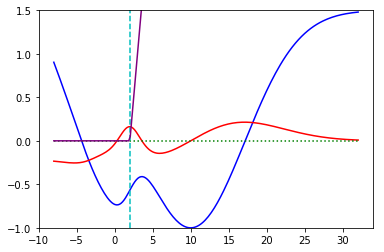

In [384]:
def penalty(x):
    return (x > 2) * (x - 2)

plt.plot(xs, f(xs), 'b')
plt.plot(xs, gradf(xs), 'r')
plt.plot((xmin, xmax), (0, 0), 'g:')
plt.plot((2, 2), (ymin, ymax), 'c--')
plt.plot(xs, penalty(xs), color='purple')
plt.ylim((ymin, ymax))

(-1, 1.5)

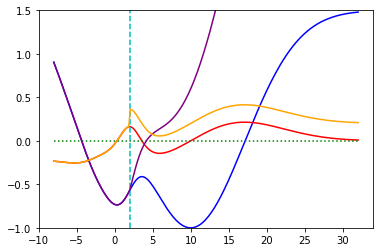

In [400]:
def loss(x, la):
    return f(x) + la * penalty(x)

def dloss(x, la):
    return gradf(x) + la * (x > 2)

lamb = 0.2
plt.plot(xs, f(xs), 'b')
plt.plot(xs, gradf(xs), 'r')
plt.plot((xmin, xmax), (0, 0), 'g:')
plt.plot((2, 2), (ymin, ymax), 'c--')

plt.plot(xs, loss(xs, lamb), color='purple')
plt.plot(xs, dloss(xs, lamb), color='orange')
plt.ylim((ymin, ymax))

Test lamba and find solution

x0 =  -5
x0 =  5
Reach termination criteria at i=4853 with 0.0000100


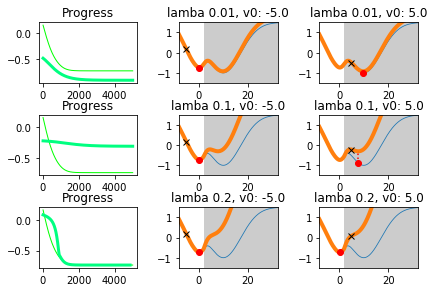

In [407]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.tight_layout(rect=[0.0, 0.0, 1, 1])

xmin, xmax = -8, 32
ymin, ymax = -1.5, 1.5
xs = np.linspace(xmin,xmax,200)

xregion = [xmax, 2, 2, xmax]
yregion = [ymin, ymin, ymax, ymax]

lambs = [0.01, 0.1, 0.2]
ss = [0.02, 0.02, 0.02] 

x0s = (-5, 5)

for j,x0 in enumerate(x0s):
    #x0 = np.random.normal()

    print('x0 = ', x0)

    for i in range(3):
        lamb = lambs[i]
        loss_la = lambda x: loss(x, lamb)
        grad_la = lambda x: dloss(x, lamb)

        x, fs = gd(grad_la, x0, loss_la, step_size=ss[i], Nmax=5000, tol=1e-5)

        plt.subplot(3,3,1 + 3*i)
        plt.plot(fs, color=(0, 1, 0.5 *j), linewidth=1 + 2*j )
        plt.title('Progress')

        plt.subplot(3,3,2 + 3*i + j)
        plt.fill(xregion, yregion, color=(0.8, 0.8, 0.8)) 
        plt.plot(xs, f(xs), linewidth=0.8)
        plt.plot(xs, loss_la(xs), linewidth=4)
        plt.plot([x, x], [f(x), loss_la(x)], 'r:')
        plt.plot(x0, loss_la(x0), 'kx')
        plt.plot(x, f(x), 'ro')
        plt.title('lamba {}, v0: {:.1f}'.format(lamb, x0))
        plt.ylim([ymin,ymax])
        plt.xlim((xmin,xmax))

